# IMPORT


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path
import os
import pandas as pd
import seaborn as sns


# READFILE


In [2]:
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'num'
]

DATA = pd.read_csv(
    'Data/processed.cleveland.csv',
	encoding = 'latin1',
    names = col_names,
    header = None,
)

DATA.replace('?', pd.NA, inplace=True)

DATA['num'] = DATA['num'].apply(lambda x: 1 if x>0 else 0)

DATA


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
DATA.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# ANYLIST FEATURES


In [4]:
print(DATA.columns.values)


['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'num']


# DATA PREPROCESSING


In [5]:
print("Missing Values per Column:")
print(DATA.isnull().sum())
print("------------------------------------")
print("Infinity Values per Column:")
print((DATA == np.inf).sum() + (DATA == -np.inf).sum())


Missing Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
------------------------------------
Infinity Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


The answers is **YES**, There are some patients don't have 'ca' or 'thal' on this dataset. We will erase those all rows and collumns that is contains an error value.


In [6]:
df_clean = DATA.dropna()
df_clean


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


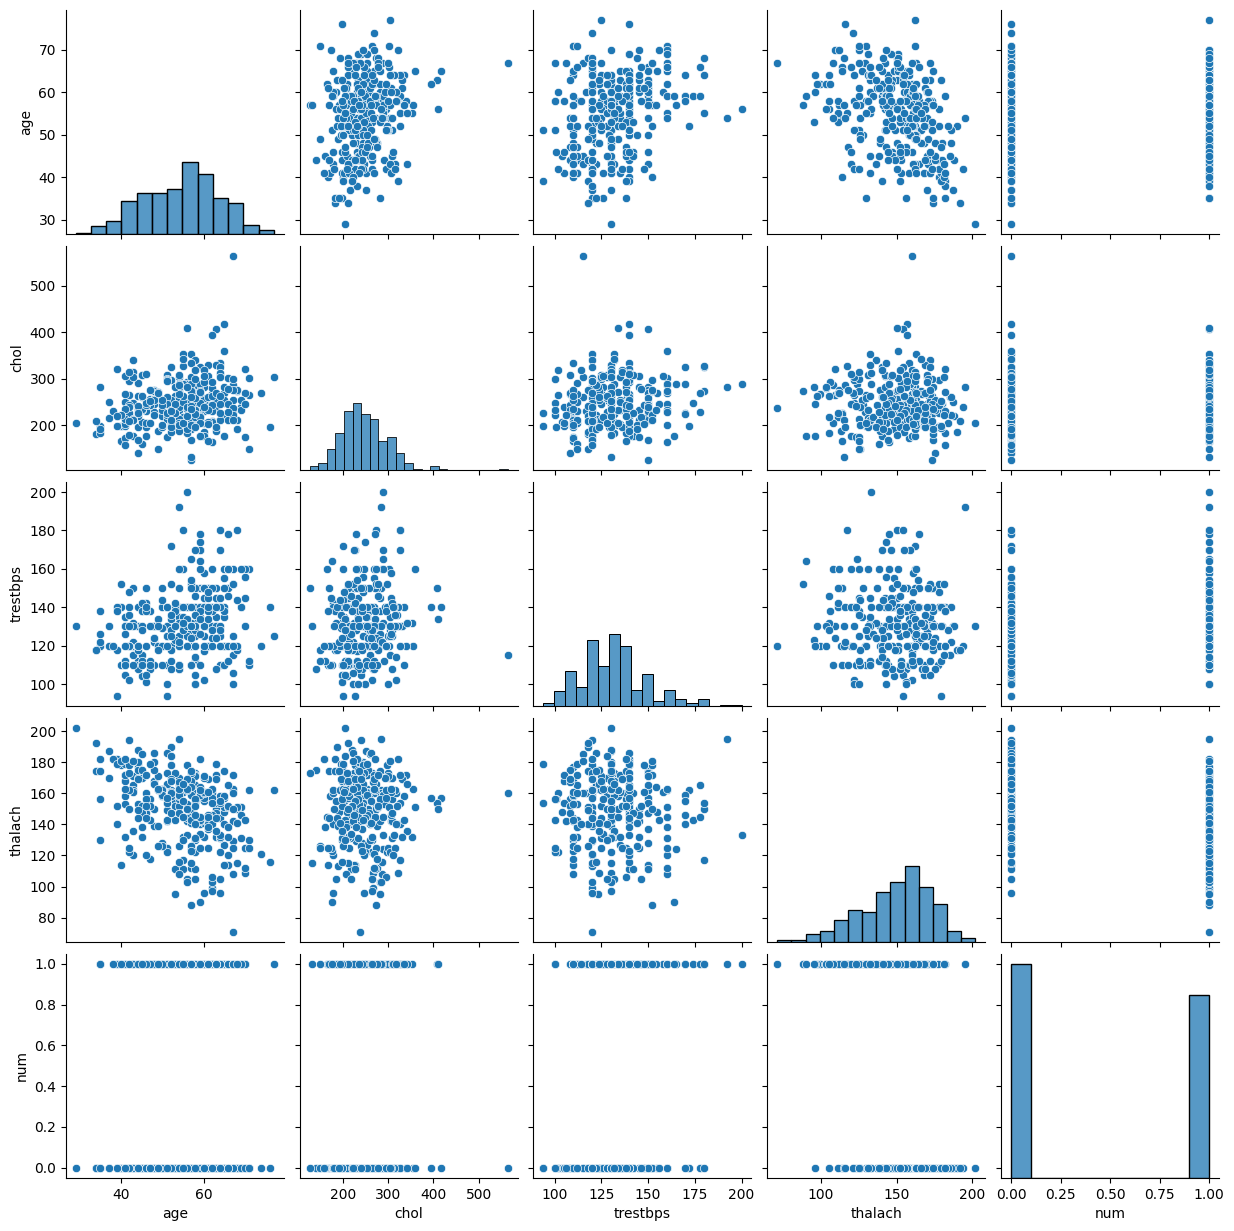

In [7]:
sns.pairplot(data = df_clean,vars=['age', 'chol', 'trestbps','thalach','num'])
plt.show()


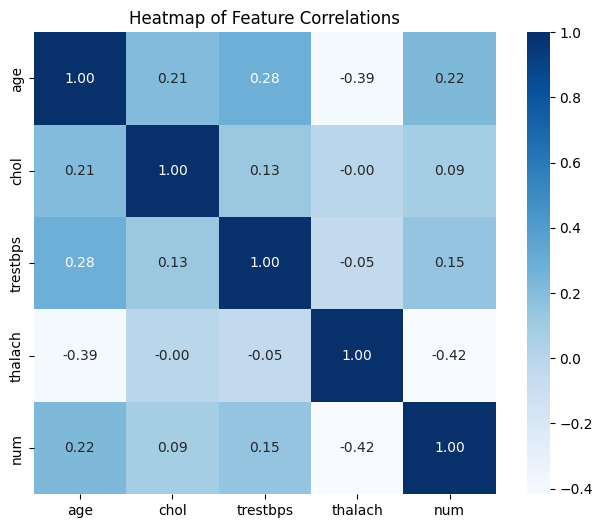

In [8]:
selected_columns = ['age', 'chol', 'trestbps','thalach','num']
corr = DATA[selected_columns].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()


# ANYLIST CATEGORICAL DATA


In [9]:
import matplotlib.pyplot as plt
def histogram(variable):
    """
    input: variable ex:"Age"
    output: histogram & value count
    """
    # get feature
    var = DATA[variable]

    # count number of continuous variable
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(8,3))
    plt.hist(var, bins=20, color='blue', alpha=0.7)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))

def bar_plot(variable):
    """
    input: variable ex:"Sex"
    output: bar plot & value count
    """
    # get feature
    var = DATA[variable]

    # count number of categorical variable
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(8,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))


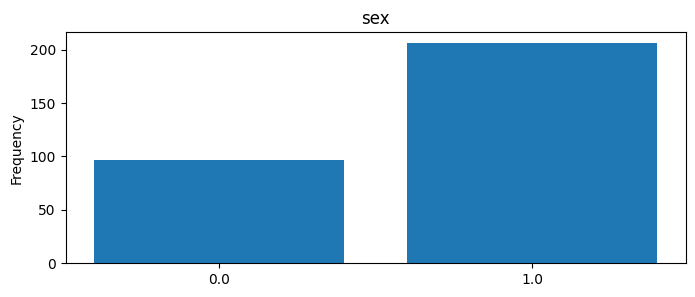

sex: 
sex
1.0    206
0.0     97
Name: count, dtype: int64


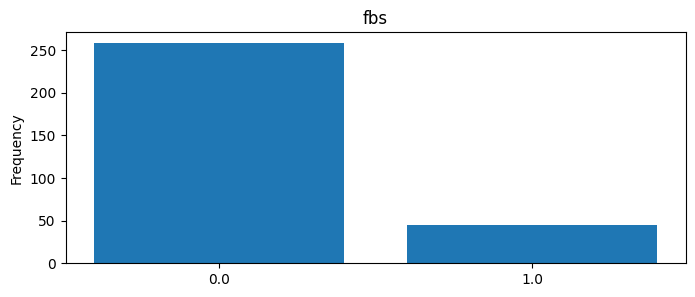

fbs: 
fbs
0.0    258
1.0     45
Name: count, dtype: int64


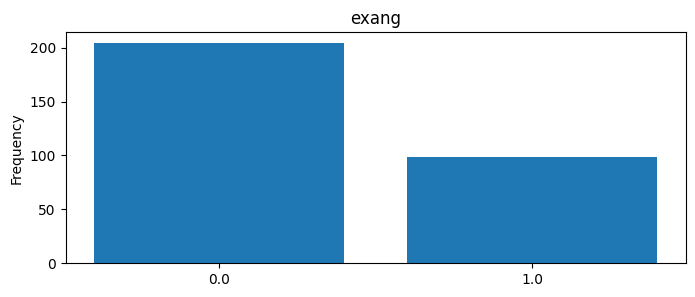

exang: 
exang
0.0    204
1.0     99
Name: count, dtype: int64


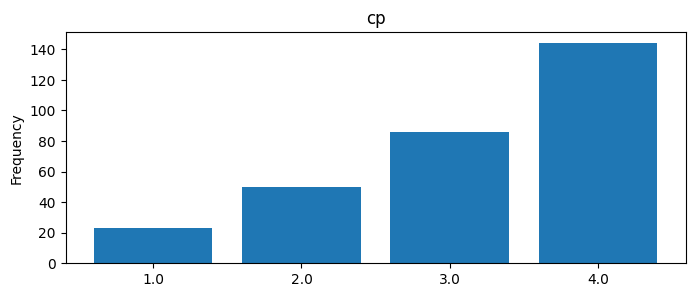

cp: 
cp
4.0    144
3.0     86
2.0     50
1.0     23
Name: count, dtype: int64


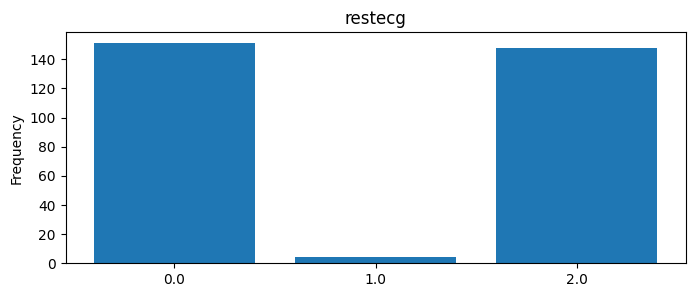

restecg: 
restecg
0.0    151
2.0    148
1.0      4
Name: count, dtype: int64


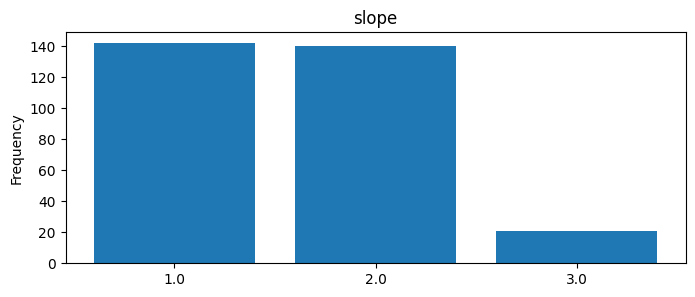

slope: 
slope
1.0    142
2.0    140
3.0     21
Name: count, dtype: int64


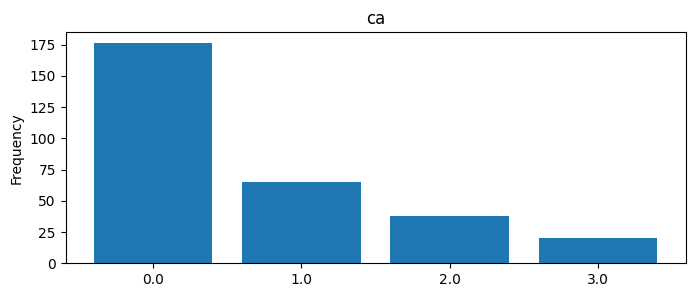

ca: 
ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64


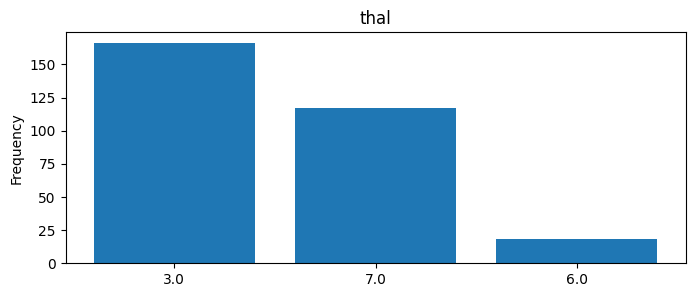

thal: 
thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64


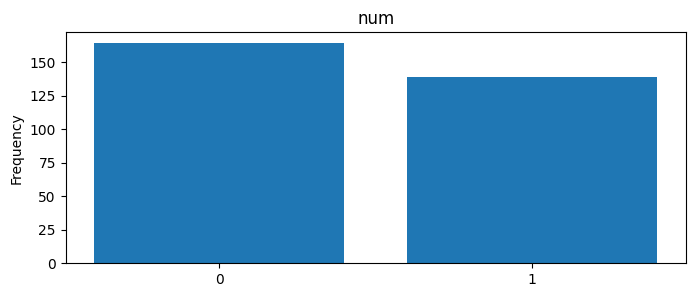

num: 
num
0    164
1    139
Name: count, dtype: int64


In [10]:
category1=['sex', 'fbs', 'exang','cp','restecg', 'slope', 'ca', 'thal', 'num']
for c in category1:
    bar_plot(c)


# ANYLIST NUMERICAL DATA


In [11]:
def plot_hist(variable):
    plt.figure(figsize=(8,3))
    plt.hist(DATA[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribituon with hist".format(variable))
    plt.show()


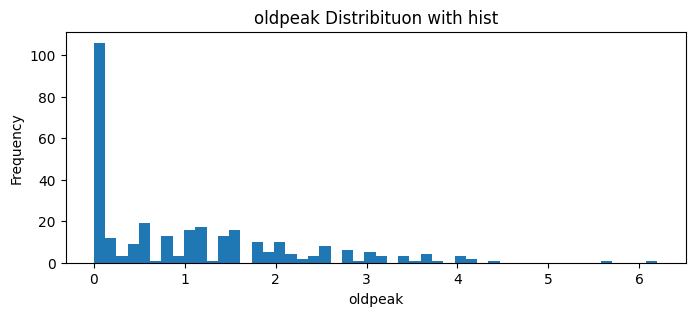

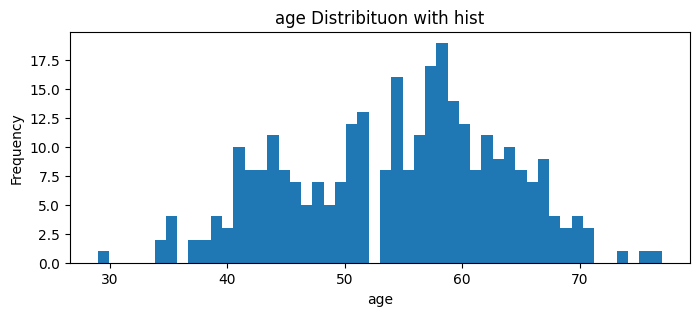

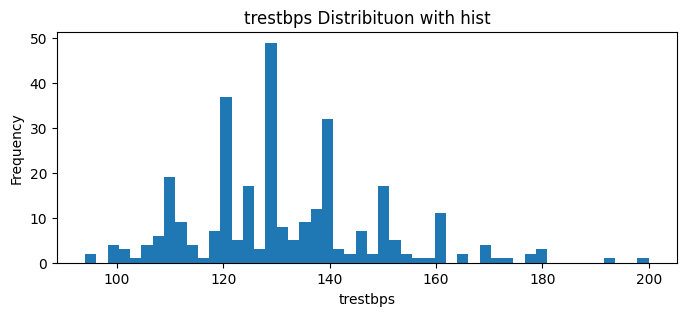

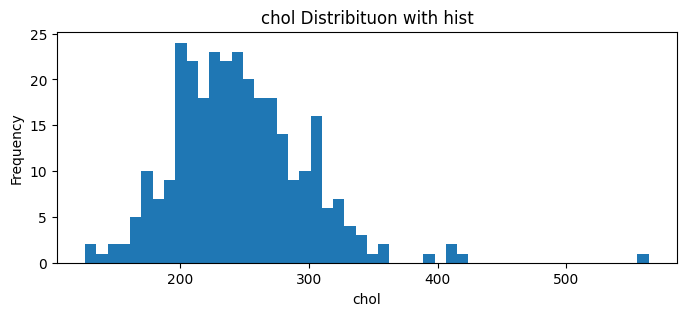

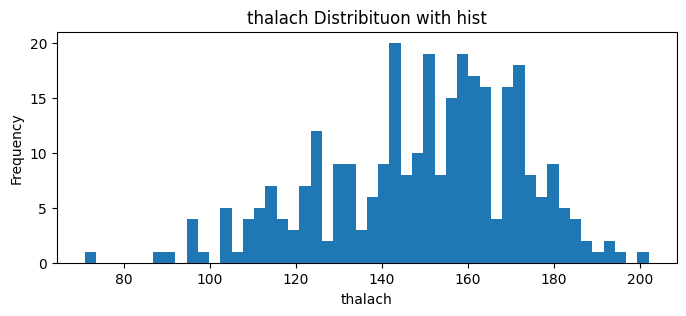

In [12]:
numericVar=['oldpeak', 'age', 'trestbps', 'chol', 'thalach']
for n in numericVar:
    plot_hist(n)


# BASIC DATA ANYLIST


In this section I will use some Categorial Features to anylist and create a simple rating table for those features


In [13]:
DATA[["sex","num"]]


,sex,num
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,0
4,0.0,0
...,...,...
298,1.0,1
299,1.0,1
300,1.0,1
301,0.0,1


In [14]:
DATA[["exang","num"]].groupby(["exang"],as_index = False).mean().sort_values(by='num', ascending=False)


,exang,num
1,1.0,0.767677
0,0.0,0.308824


In [15]:
DATA[["cp","num"]].groupby(["cp"],as_index = False).mean().sort_values(by='num', ascending=False)


,cp,num
3,4.0,0.729167
0,1.0,0.304348
2,3.0,0.209302
1,2.0,0.180000


In [16]:
DATA[["restecg","num"]].groupby(["restecg"],as_index = False).mean().sort_values(by='num', ascending=False)


,restecg,num
1,1.0,0.750000
2,2.0,0.540541
0,0.0,0.370861


In [17]:
DATA[["slope","num"]].groupby(["slope"],as_index = False).mean().sort_values(by='num', ascending=False)


,slope,num
1,2.0,0.650000
2,3.0,0.571429
0,1.0,0.253521


In [18]:
DATA[["ca","num"]].groupby(["ca"],as_index = False).mean().sort_values(by='num', ascending=False)


,ca,num
3,3.0,0.850000
2,2.0,0.815789
1,1.0,0.676923
0,0.0,0.261364


In [19]:
DATA[["sex","num"]].groupby(["sex"],as_index = False).mean().sort_values(by='num', ascending=False)


,sex,num
1,1.0,0.553398
0,0.0,0.257732


# HEART DISEASE CLASSIFICATION WITH DECISION TREE

## From EDA to Classification

Based on the Exploratory Data Analysis above, we observed several key insights:

1. **Missing Data**: The dataset has missing values in 'ca' and 'thal' columns that need to be handled
2. **Feature Correlations**: The correlation heatmap showed relationships between features like age, cholesterol, and target variable
3. **Data Distribution**: We analyzed both categorical and numerical features to understand their distributions
4. **Feature Importance**: Some features like 'sex', 'exang', 'cp' showed strong correlations with heart disease

Now we will use these insights to build and evaluate machine learning models for heart disease prediction.


# Import Classification Libraries


In [20]:
import pandas as pd
import graphviz
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown, Image
from IPython.display import Markdown, display as ds
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


# READFILE AND PREPROCESSING FOR CLASSIFICATION

## Data Preparation Based on EDA Findings


In [21]:
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'num'
]

df = pd.read_csv(
    r'Data/processed.cleveland.csv',
	encoding = 'latin1',
    names = col_names,
    header = None,
    na_values = '?'
)

y = df['num'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop('num', axis = 1)

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [22]:
df.dropna(
    subset=[
        'age','sex','cp','trestbps','chol','fbs',
        'restecg','thalach','exang','oldpeak','slope','ca','thal'
    ],
    inplace=True
)

df['num'] = df['num'].apply(lambda x: 1 if x>0 else 0)

df = pd.get_dummies(
    df,
    columns=['sex','cp','restecg','slope','thal'],
    drop_first=True
)

df


,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,True,False,False,False,False,True,False,True,True,False
1,67.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,True,False,False,True,False,True,True,False,False,False
2,67.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,True,False,False,True,False,True,True,False,False,True
3,37.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,True,False,True,False,False,False,False,True,False,False
4,41.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,1,False,False,False,True,False,False,True,False,False,True
298,45.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,True,False,False,False,False,False,True,False,False,True
299,68.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,1,True,False,False,True,False,False,True,False,False,True
300,57.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,1,True,False,False,True,False,False,True,False,False,True


# TRAIN SPLIT TEST


In [23]:
ratios = [
    (0.4, 0.6),
    (0.6, 0.4),
    (0.8, 0.2),
    (0.9, 0.1),
]

subsets = {}

for tr, te in ratios:
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, 
        train_size = tr, 
        stratify = y, 
        random_state = 42
    )
    key = f'{int(tr * 100)}/{int(te * 100)}'
    subsets[key] = {
        'X_train': X_tr, 'y_train': y_tr,
        'X_test' : X_te, 'y_test' : y_te,
    }

print("Finish to create subsets:", list(subsets.keys()))


Finish to create subsets: ['40/60', '60/40', '80/20', '90/10']


# TRAIN MODEL


In [24]:
clf_dict = {}

# Train models for different train/test splits
for key in ['40/60', '60/40', '80/20', '90/10']:
    data = subsets[key]
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(data['X_train'], data['y_train'])
    clf_dict[key] = clf
    print(f"Trained model for split {key}")


Trained model for split 40/60
Trained model for split 60/40
Trained model for split 80/20
Trained model for split 90/10


# DECISION TREE DEPTH ANALYSIS


Max depth = None, Accuracy = 0.7705
Max depth = 2, Accuracy = 0.7705
Max depth = 3, Accuracy = 0.7869
Max depth = 4, Accuracy = 0.7869
Max depth = 5, Accuracy = 0.8033
Max depth = 6, Accuracy = 0.7049
Max depth = 7, Accuracy = 0.6885

=== Summary Table ===
max_depth  Accuracy
     None  0.770492
        2  0.770492
        3  0.786885
        4  0.786885
        5  0.803279
        6  0.704918
        7  0.688525


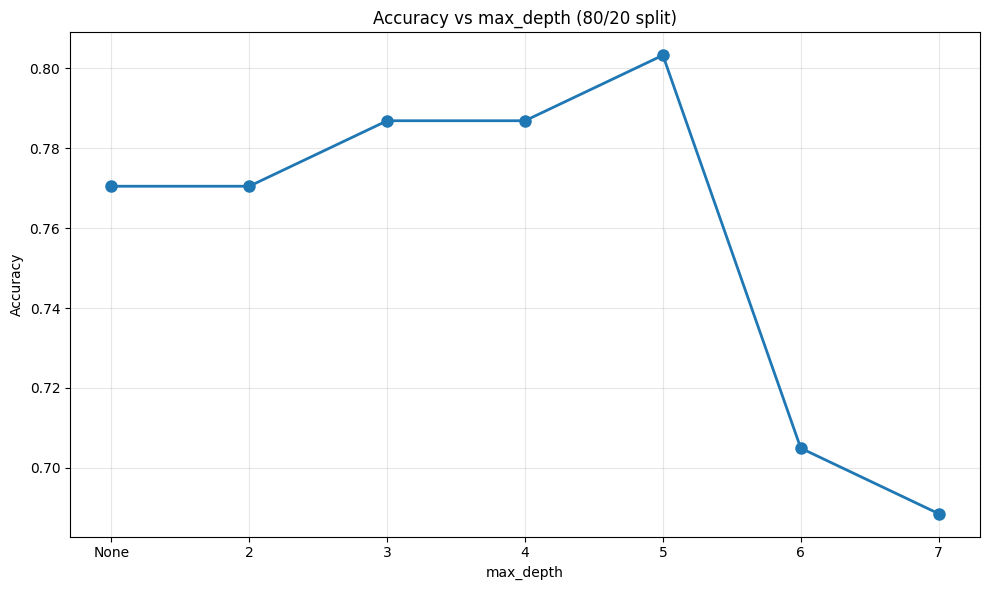

In [25]:
data_8020 = subsets['80/20']
X_train = data_8020['X_train']
y_train = data_8020['y_train']
X_test, y_test = data_8020['X_test'], data_8020['y_test']
feature_cols = X_train.columns.tolist()

# Huấn luyện với các max_depth khác nhau
depths = [None, 2, 3, 4, 5, 6, 7]
results = []

for d in depths:
    # Huấn luyện
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = d, random_state = 42)
    clf.fit(X_train, y_train)

    # Đo accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((d, acc))
    
    depth_label = 'None' if d is None else str(d)
    print(f"Max depth = {depth_label}, Accuracy = {acc:.4f}")

# Tạo bảng tổng hợp và vẽ đồ thị
depth_vals, acc_vals = zip(*results)
depth_labels = ['None' if d is None else str(d) for d in depth_vals]

df_results = pd.DataFrame({'max_depth': depth_labels, 'Accuracy': acc_vals})
print("\n=== Summary Table ===")
print(df_results.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.plot(depth_labels, acc_vals, marker = 'o', linewidth=2, markersize=8)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth (80/20 split)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# TRAIN/TEST SPLIT DISTRIBUTION ANALYSIS


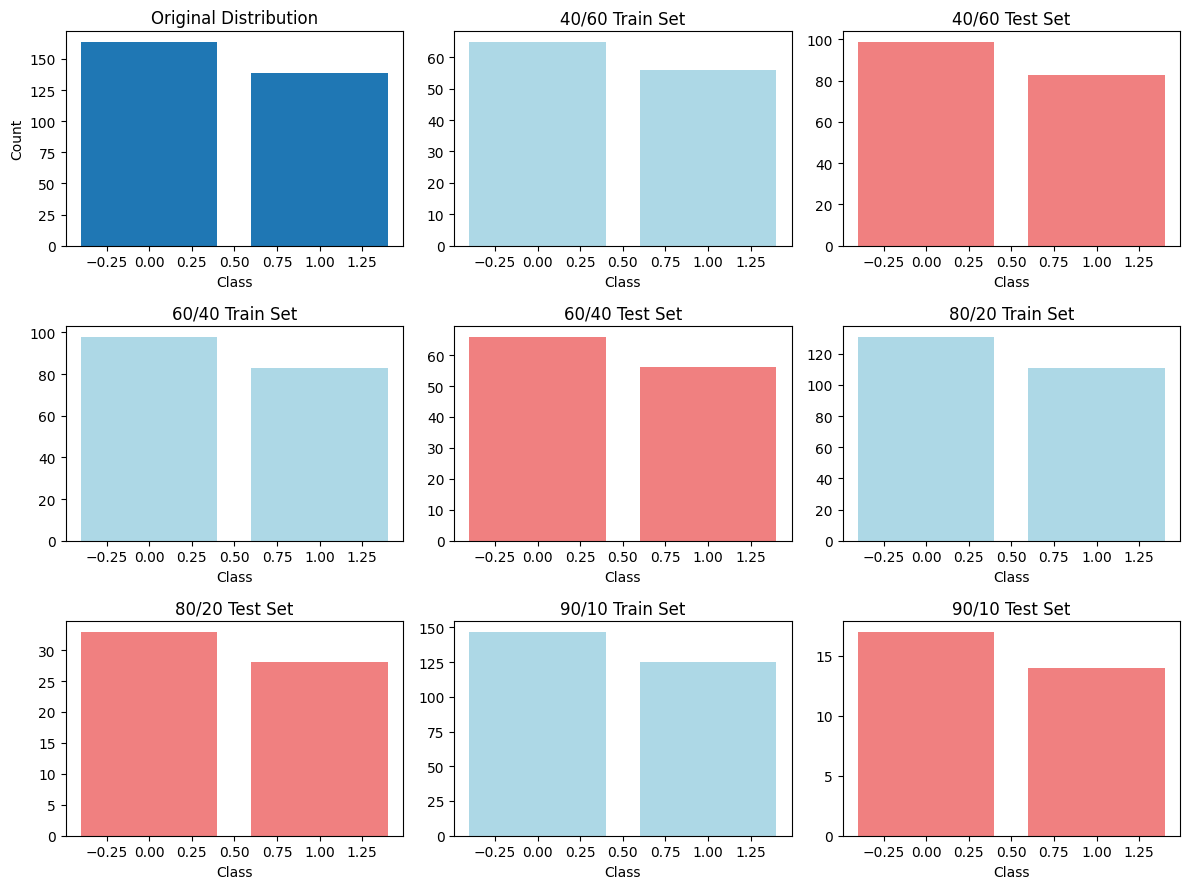

In [26]:
def plot_all_distributions(y, subsets):
    n_plots = 1 + len(subsets)*2   # 1 original + mỗi split 2 (train & test)
    cols = 3
    rows = (n_plots + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()

    # 1) Original
    cnt = y.value_counts().sort_index()
    axes[0].bar(cnt.index, cnt.values)
    axes[0].set_title('Original Distribution')
    axes[0].set_xlabel('Class'); axes[0].set_ylabel('Count')

    # 2) Train & Test cho từng tỷ lệ
    idx = 1
    for key, data in subsets.items():
        # train
        cnt = data['y_train'].value_counts().sort_index()
        axes[idx].bar(cnt.index, cnt.values, color='lightblue')
        axes[idx].set_title(f'{key} Train Set')
        axes[idx].set_xlabel('Class')
        idx += 1
        # test
        cnt = data['y_test'].value_counts().sort_index()
        axes[idx].bar(cnt.index, cnt.values, color='lightcoral')
        axes[idx].set_title(f'{key} Test Set')
        axes[idx].set_xlabel('Class')
        idx += 1

    # Tắt các subplot thừa
    for ax in axes[idx:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Gọi hàm để visualize
plot_all_distributions(y, subsets)


In [27]:
# Evaluate all models
for key, clf in clf_dict.items():
    data = subsets[key]
    y_pred = clf.predict(data['X_test'])
    y_true = data['y_test']
    
    accuracy = accuracy_score(y_true, y_pred)
    misclassified_count = (y_pred != y_true).sum()
    total_samples = len(y_true)
    misclassified_rate = 100 * misclassified_count / total_samples
    
    print(f"=== Split {key} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
    print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")
    print()


=== Split 40/60 ===
Accuracy: 0.7308
Numbers of Wrong labels: 49/182
Ratio of wrong labels: 26.92%

=== Split 60/40 ===
Accuracy: 0.7541
Numbers of Wrong labels: 30/122
Ratio of wrong labels: 24.59%

=== Split 80/20 ===
Accuracy: 0.7705
Numbers of Wrong labels: 14/61
Ratio of wrong labels: 22.95%

=== Split 90/10 ===
Accuracy: 0.7419
Numbers of Wrong labels: 8/31
Ratio of wrong labels: 25.81%



# EXTENDED WORK : RANDOM FOREST CLASSIFICATION

## Improving Performance with Ensemble Methods

From our Decision Tree analysis, we can see the performance varies across different splits. Let's try Random Forest, which typically provides better performance by:
- Reducing overfitting through ensemble learning
- Handling feature interactions better
- Providing more stable predictions

Random Forest combines multiple decision trees to make final predictions, potentially improving upon our single Decision Tree results.


In [28]:
key = '40/60'
data = subsets[key]

# Train Random Forest
clf_rf_40_60 = RandomForestClassifier(n_estimators=10, random_state=42)
clf_rf_40_60.fit(data['X_train'], data['y_train'])

# Predict
y_pred_rf = clf_rf_40_60.predict(data['X_test'])

# Confusion Matrix
cm_rf = confusion_matrix(data['y_test'], y_pred_rf)
print(f"Confusion Matrix (Random Forest - {key}):")
print(cm_rf)

# Classification Report
print(f"Classification Report (Random Forest - {key}):")
print(classification_report(data['y_test'], y_pred_rf))

# Calculate accuracy and misclassification rate
y_true = data['y_test']
accuracy = accuracy_score(y_true, y_pred_rf)
misclassified_count = (y_pred_rf != y_true).sum()
total_samples = len(y_true)
misclassified_rate = 100 * misclassified_count / total_samples

print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")


Confusion Matrix (Random Forest - 40/60):
[[84 15]
 [17 66]]
Classification Report (Random Forest - 40/60):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        99
           1       0.81      0.80      0.80        83

    accuracy                           0.82       182
   macro avg       0.82      0.82      0.82       182
weighted avg       0.82      0.82      0.82       182

Numbers of Wrong labels: 32/182
Ratio of wrong labels: 17.58%


# REFERENCES


# CONCLUSION AND SUMMARY

## Key Findings from our Analysis

### From EDA:
1. **Data Quality**: Dataset has 303 samples with missing values in 'ca' (4) and 'thal' (2) columns
2. **Feature Insights**: 
   - Males show higher disease rates than females
   - Exercise-induced angina correlates with higher disease probability
   - Chest pain type and other cardiac features show varying disease associations
3. **Data Distribution**: Both numerical and categorical features show distinct patterns for disease vs non-disease cases

### From Classification:
1. **Model Performance**: Decision Tree models achieved varying accuracy across different train/test splits
2. **Random Forest Improvement**: Ensemble method typically shows better generalization than single Decision Tree
3. **Feature Importance**: The models confirm insights from EDA about which features are most predictive

### Workflow Connection:
This analysis demonstrates a complete machine learning pipeline:
**EDA → Data Understanding → Feature Engineering → Model Training → Evaluation → Insights**

The EDA phase informed our preprocessing decisions, while the classification results validate our exploratory findings about feature importance and data patterns.

---

## References

**EDA References:**<br>
https://machinelearningcoban.com/tabml_book/ch_data_processing/eda.html<br><br>
Source Dataset: https://archive.ics.uci.edu/dataset/45/heart+disease<br><br>

**Classification References:**<br>
https://machinelearningcoban.com/tabml_book/ch_model/random_forest.html<br>


# ANYLIST CATEGORICAL DATA


# COMPREHENSIVE CLASSIFICATION ANALYSIS



In [29]:
# Import additional libraries for comprehensive classification
import graphviz
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown, Image
from IPython.display import Markdown, display as ds
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# COMPLETE DATA PREPROCESSING FOR CLASSIFICATION


In [30]:
# Load and preprocess data exactly as in heart-Classification.ipynb
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'num'
]

df = pd.read_csv(
    r'Data/processed.cleveland.csv',
	encoding = 'latin1',
    names = col_names,
    header = None,
    na_values = '?'
)

y = df['num'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop('num', axis = 1)

print("Original dataset shape:", df.shape)
df.head()


Original dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [31]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [32]:
# Clean data and apply preprocessing
df.dropna(
    subset=[
        'age','sex','cp','trestbps','chol','fbs',
        'restecg','thalach','exang','oldpeak','slope','ca','thal'
    ],
    inplace=True
)

df['num'] = df['num'].apply(lambda x: 1 if x>0 else 0)

# Apply one-hot encoding
df = pd.get_dummies(
    df,
    columns=['sex','cp','restecg','slope','thal'],
    drop_first=True
)

print("After preprocessing shape:", df.shape)
df.head()


After preprocessing shape: (297, 19)


,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,True,False,False,False,False,True,False,True,True,False
1,67.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,True,False,False,True,False,True,True,False,False,False
2,67.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,True,False,False,True,False,True,True,False,False,True
3,37.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,True,False,True,False,False,False,False,True,False,False
4,41.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,False,True,False,False,False,True,False,False,False,False


In [33]:
# Prepare features and labels for classification
X_class = df.drop('num', axis=1)
y_class = df['num']

# Create multiple train-test splits for robust evaluation
ratios = [
    (0.4, 0.6),
    (0.6, 0.4),
    (0.8, 0.2),
    (0.9, 0.1),
]

subsets_class = {}

for tr, te in ratios:
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_class, y_class, 
        train_size = tr, 
        stratify = y_class, 
        random_state = 42
    )
    key = f'{int(tr * 100)}/{int(te * 100)}'
    subsets_class[key] = {
        'X_train': X_tr, 'y_train': y_tr,
        'X_test' : X_te, 'y_test' : y_te,
    }

print("Finish to create subsets:", list(subsets_class.keys()))

# Verify stratification is maintained (simplified check)
orig_counts = y_class.value_counts(normalize=True).sort_index()

for key, data in subsets_class.items():
    tr_counts = data['y_train'].value_counts(normalize=True).sort_index()
    te_counts = data['y_test' ].value_counts(normalize=True).sort_index()
    print(f"Split {key}: Train ratio = {tr_counts.values}, Test ratio = {te_counts.values}")
    
    # Check that proportions are reasonably close (within 5% difference)
    tr_diff = abs(tr_counts - orig_counts).max()
    te_diff = abs(te_counts - orig_counts).max()
    
    print(f"  Train difference from original: {tr_diff:.3f}")
    print(f"  Test difference from original: {te_diff:.3f}")
    
    # More lenient assertion - allow up to 10% difference due to small sample sizes
    if tr_diff > 0.1:
        print(f"  Warning: Train set proportions differ significantly from original")
    if te_diff > 0.1:
        print(f"  Warning: Test set proportions differ significantly from original")


Finish to create subsets: ['40/60', '60/40', '80/20', '90/10']
Split 40/60: Train ratio = [0.54237288 0.45762712], Test ratio = [0.53631285 0.46368715]
  Train difference from original: 0.004
  Test difference from original: 0.002
Split 60/40: Train ratio = [0.53932584 0.46067416], Test ratio = [0.53781513 0.46218487]
  Train difference from original: 0.001
  Test difference from original: 0.001
Split 80/20: Train ratio = [0.54008439 0.45991561], Test ratio = [0.53333333 0.46666667]
  Train difference from original: 0.001
  Test difference from original: 0.005
Split 90/10: Train ratio = [0.53932584 0.46067416], Test ratio = [0.53333333 0.46666667]
  Train difference from original: 0.001
  Test difference from original: 0.005


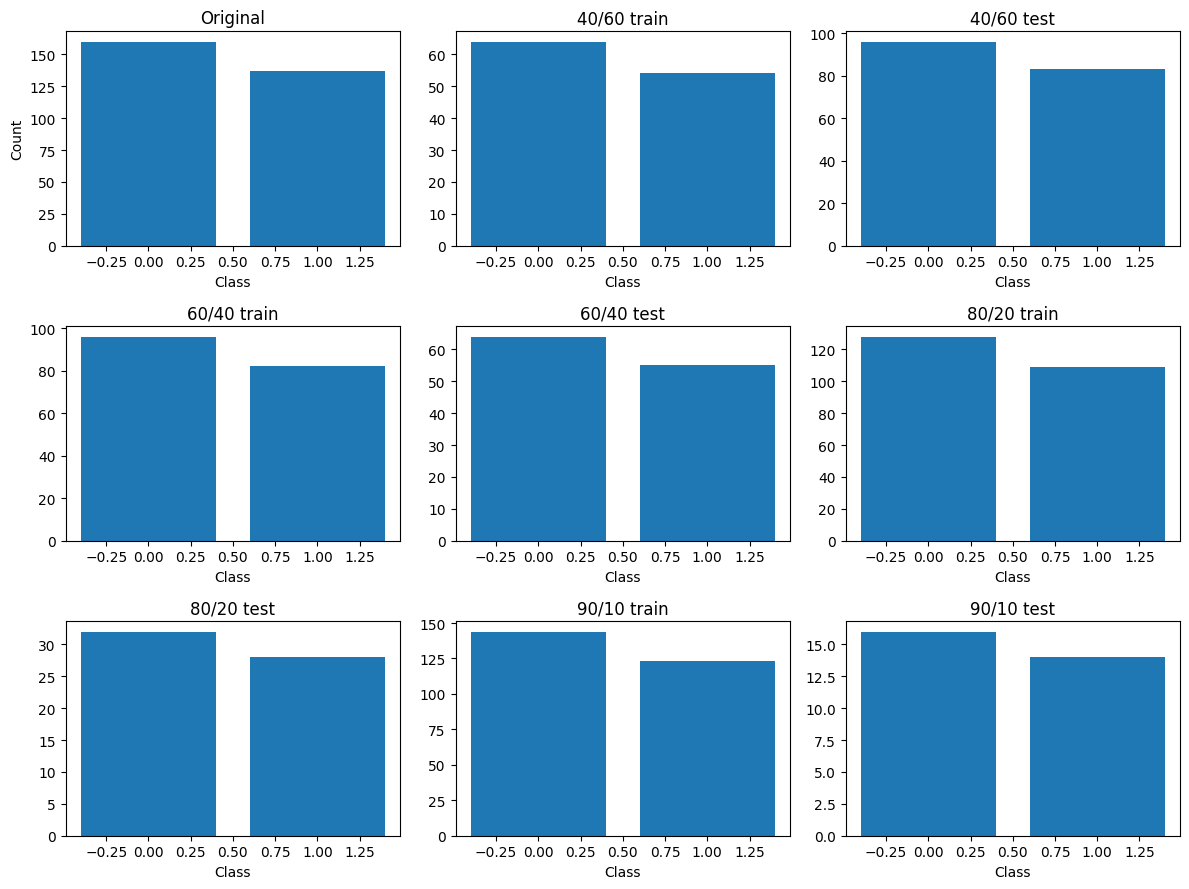

In [34]:
# Visualize train-test distributions as in original notebook
def plot_all_distributions_detailed(y, subsets):
    n_plots = 1 + len(subsets)*2   # 1 original + mỗi split 2 (train & test)
    cols = 3
    rows = (n_plots + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()

    # 1) Original
    cnt = y.value_counts().sort_index()
    axes[0].bar(cnt.index, cnt.values)
    axes[0].set_title('Original')
    axes[0].set_xlabel('Class'); axes[0].set_ylabel('Count')

    # 2) Train & Test cho từng tỷ lệ
    idx = 1
    for key, data in subsets.items():
        # train
        cnt = data['y_train'].value_counts().sort_index()
        axes[idx].bar(cnt.index, cnt.values)
        axes[idx].set_title(f'{key} train')
        axes[idx].set_xlabel('Class')
        idx += 1
        # test
        cnt = data['y_test'].value_counts().sort_index()
        axes[idx].bar(cnt.index, cnt.values)
        axes[idx].set_title(f'{key} test')
        axes[idx].set_xlabel('Class')
        idx += 1

    # Tắt các subplot thừa
    for ax in axes[idx:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Gọi hàm
plot_all_distributions_detailed(y_class, subsets_class)


# COMPREHENSIVE MODEL TRAINING


In [35]:
clf_dict_full = {}


In [36]:
# Train Decision Tree models for all splits
for key in subsets_class.keys():
    data = subsets_class[key]
    
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(data['X_train'], data['y_train'])
    clf_dict_full[key] = clf
    
    print(f"Trained Decision Tree for split {key}")
    print(f"Tree depth: {clf.get_depth()}")
    print(f"Number of leaves: {clf.get_n_leaves()}")
    print("---")

print("All models trained successfully!")


Trained Decision Tree for split 40/60
Tree depth: 11
Number of leaves: 20
---
Trained Decision Tree for split 60/40
Tree depth: 9
Number of leaves: 29
---
Trained Decision Tree for split 80/20
Tree depth: 11
Number of leaves: 42
---
Trained Decision Tree for split 90/10
Tree depth: 10
Number of leaves: 41
---
All models trained successfully!


# DECISION TREE VISUALIZATION


### Decision Tree (40/60) ###


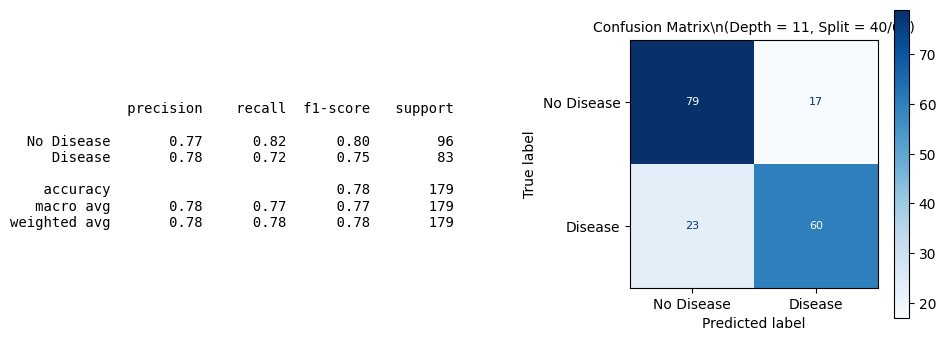

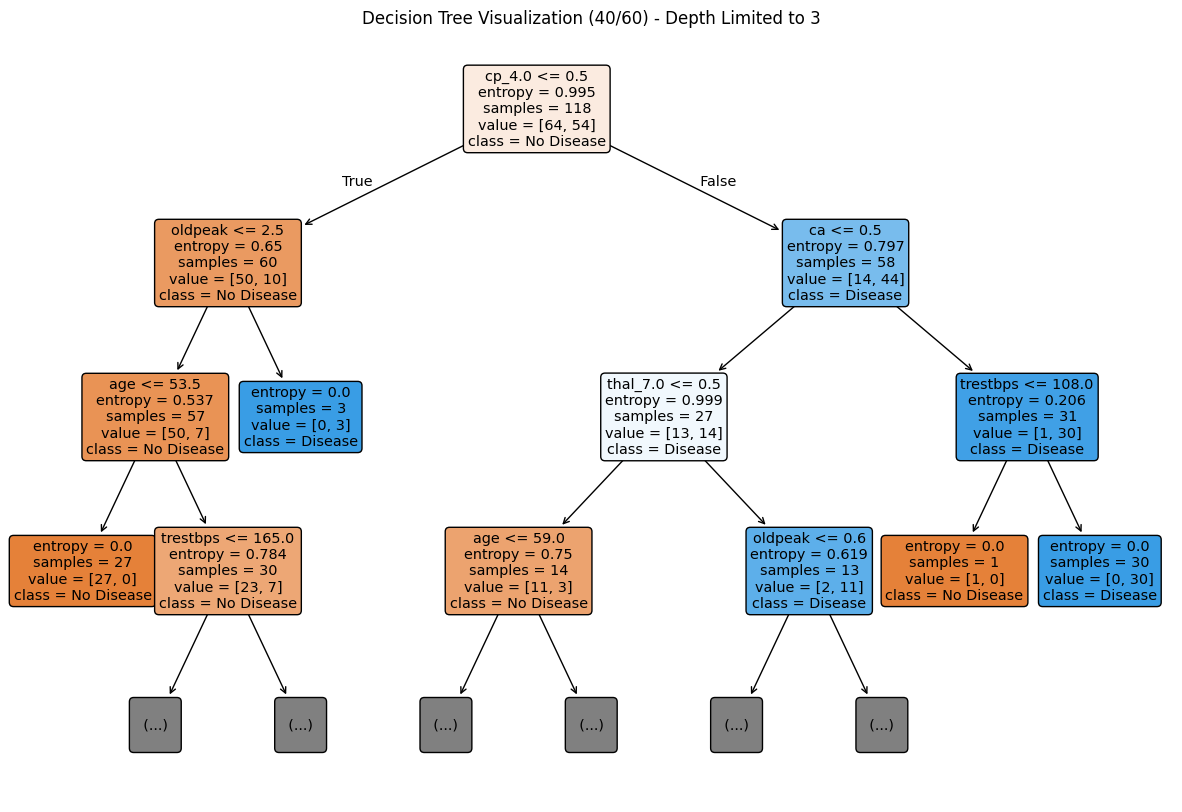

\n==================================================\n
### Decision Tree (60/40) ###


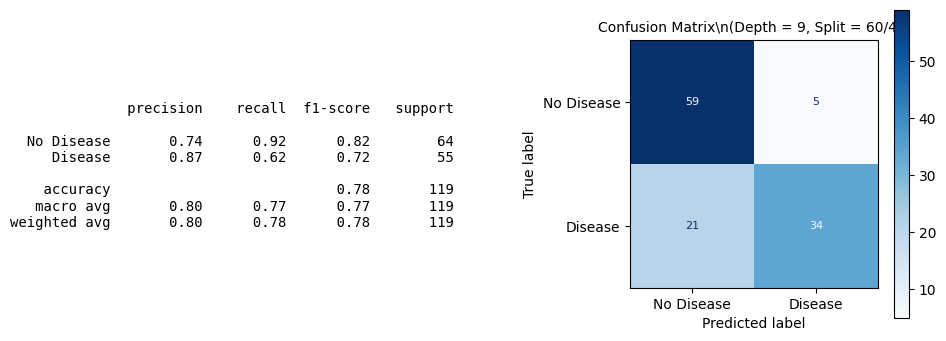

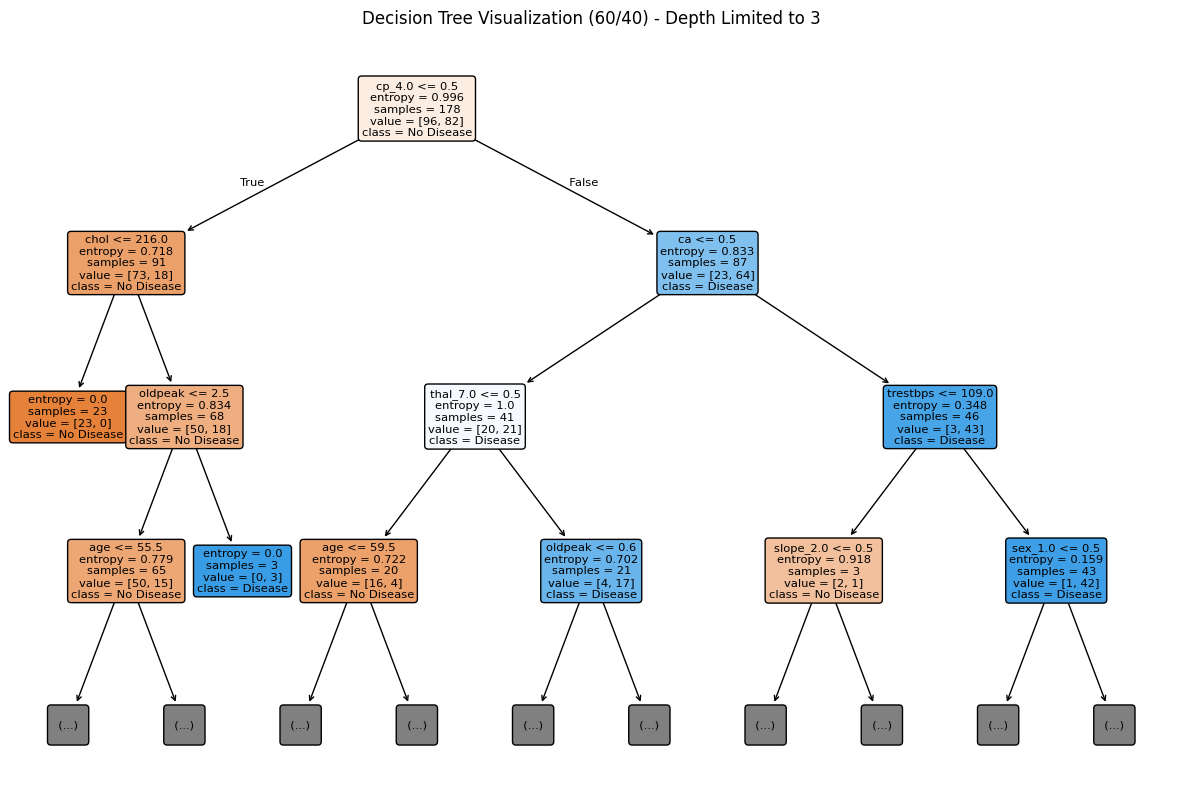

\n==================================================\n
### Decision Tree (80/20) ###


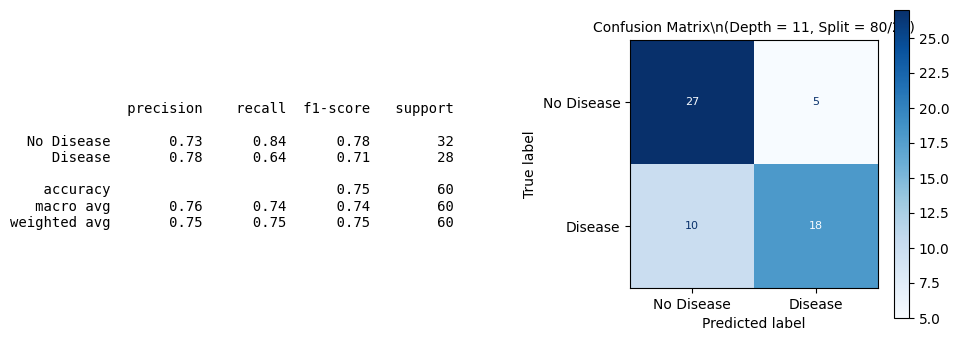

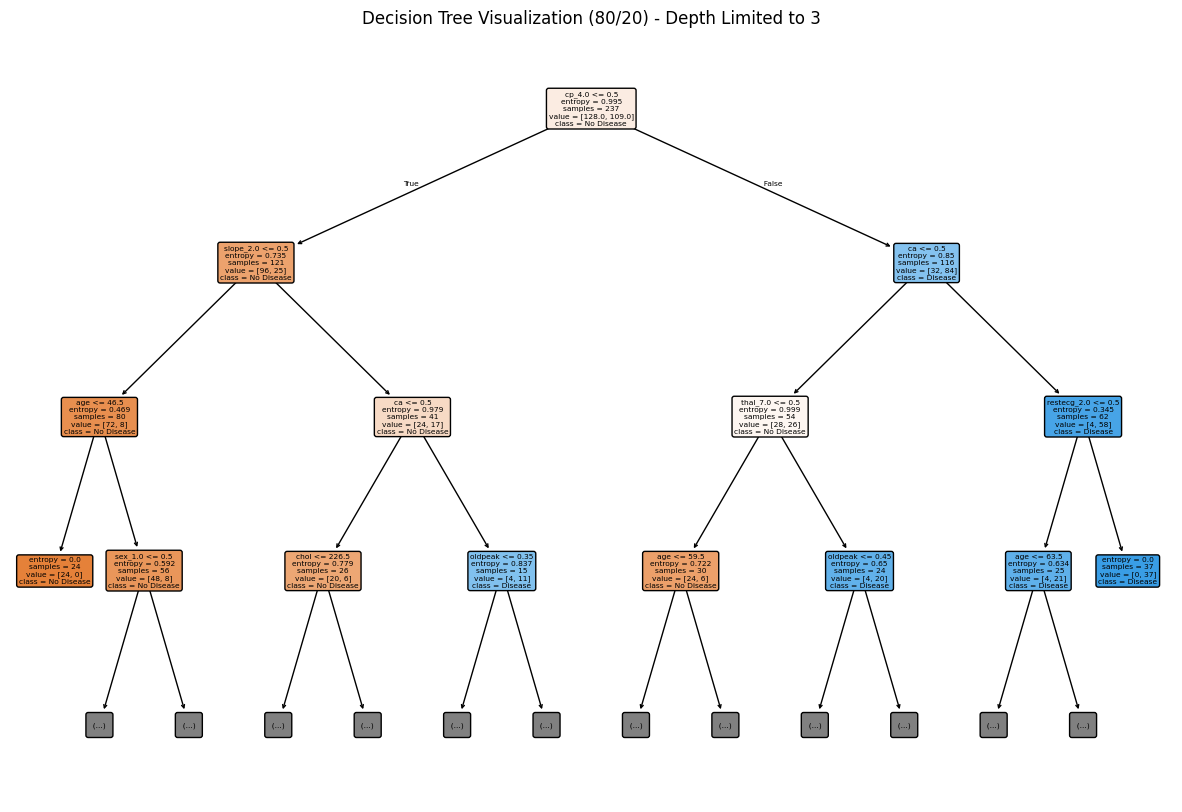

\n==================================================\n
### Decision Tree (90/10) ###


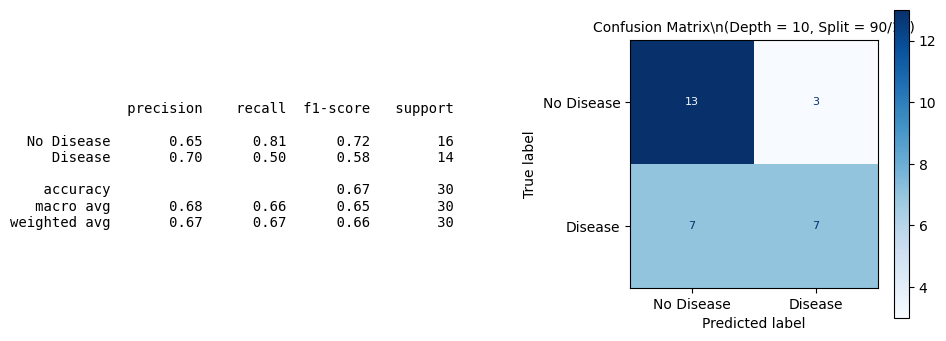

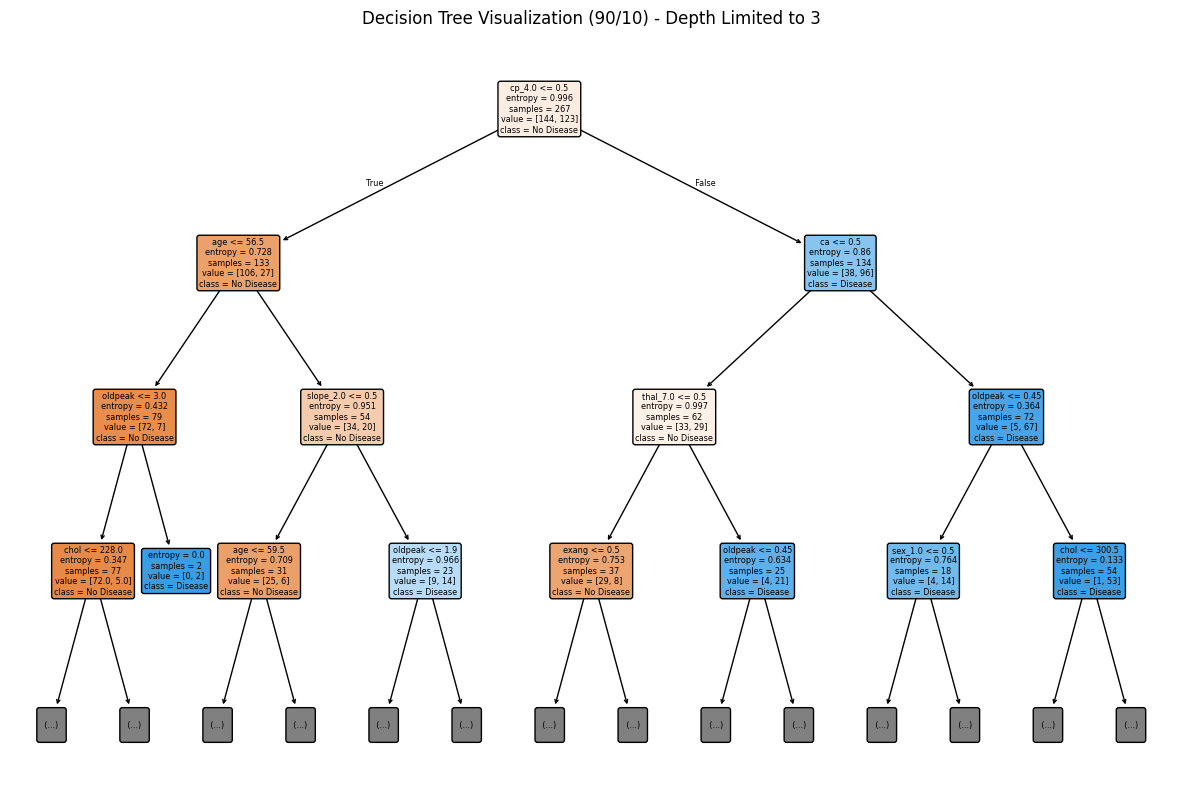

\n==================================================\n


In [37]:
# Try to visualize decision trees using graphviz or matplotlib
for key, clf in clf_dict_full.items():
    print(f"### Decision Tree ({key}) ###")
    
    # Get test data for this split
    X_test = subsets_class[key]['X_test']
    y_test = subsets_class[key]['y_test']
    y_pred = clf.predict(X_test)

    # Calculate metrics
    report = classification_report(y_test, y_pred, target_names = ['No Disease', 'Disease'])
    cm = confusion_matrix(y_test, y_pred)
    max_depth = clf.get_depth()
    train_test_ratio = key 

    # Create subplot for metrics visualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # --- Left: Classification Report ---
    axes[0].axis('off')
    axes[0].text(0, 0.7, report,
                 fontsize = 10,
                 verticalalignment = 'top',
                 fontfamily = 'monospace')

    # --- Right: Confusion Matrix ---
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = ['No Disease', 'Disease'])
    disp.plot(ax = axes[1], cmap = 'Blues', values_format = 'd')

    # Thu nhỏ font trong các ô của CM
    for txt in axes[1].texts:
        txt.set_fontsize(8)
    # Thu nhỏ tick labels
    axes[1].tick_params(axis = 'both', labelsize = 10)
    # Title với depth & ratio
    axes[1].set_title(f"Confusion Matrix\\n(Depth = {max_depth}, Split = {train_test_ratio})",
                      fontsize=10)

    # Điều chỉnh khoảng cách giữa 2 subplot
    plt.subplots_adjust(wspace = 1, hspace = 0.2)
    plt.show()
    
    # Try to visualize the tree structure using matplotlib (fallback if graphviz fails)
    try:
        plt.figure(figsize=(15, 10))
        plot_tree(clf, 
                 feature_names=X_test.columns.tolist(),
                 class_names=['No Disease', 'Disease'],
                 filled=True, 
                 rounded=True,
                 max_depth=3)  # Limit depth for readability
        plt.title(f"Decision Tree Visualization ({key}) - Depth Limited to 3")
        plt.show()
    except Exception as e:
        print(f"Could not visualize tree for {key}: {e}")
    
    print("\\n" + "="*50 + "\\n")


# DETAILED EVALUATION METRICS


In [38]:
# Detailed evaluation for each split (exact replication from original notebook)
print("DETAILED EVALUATION FOR EACH SPLIT")
print("="*50)

for key in ['40/60', '60/40', '80/20', '90/10']:
    if key in clf_dict_full:
        data = subsets_class[key]
        clf = clf_dict_full[key]
        
        # Dự đoán trên tập test tương ứng
        y_pred = clf.predict(data['X_test'])
        y_true = data['y_test']
        
        # Tính accuracy
        accuracy = accuracy_score(y_true, y_pred)
        
        # Tính số và tỉ lệ mẫu bị phân loại sai
        misclassified_count = (y_pred != y_true).sum()
        total_samples = len(y_true)
        misclassified_rate = 100 * misclassified_count / total_samples
        
        print(f"=== Split {key} ===")
        print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
        print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")
        print(f"Accuracy: {accuracy:.4f}")
        print()


DETAILED EVALUATION FOR EACH SPLIT
=== Split 40/60 ===
Numbers of Wrong labels: 40/179
Ratio of wrong labels: 22.35%
Accuracy: 0.7765

=== Split 60/40 ===
Numbers of Wrong labels: 26/119
Ratio of wrong labels: 21.85%
Accuracy: 0.7815

=== Split 80/20 ===
Numbers of Wrong labels: 15/60
Ratio of wrong labels: 25.00%
Accuracy: 0.7500

=== Split 90/10 ===
Numbers of Wrong labels: 10/30
Ratio of wrong labels: 33.33%
Accuracy: 0.6667



# MAX DEPTH ANALYSIS (80/20 SPLIT)

Complete max depth analysis exactly as in the original classification notebook.


Max Depth Analysis Results:
Max Depth = None: Accuracy = 0.7500


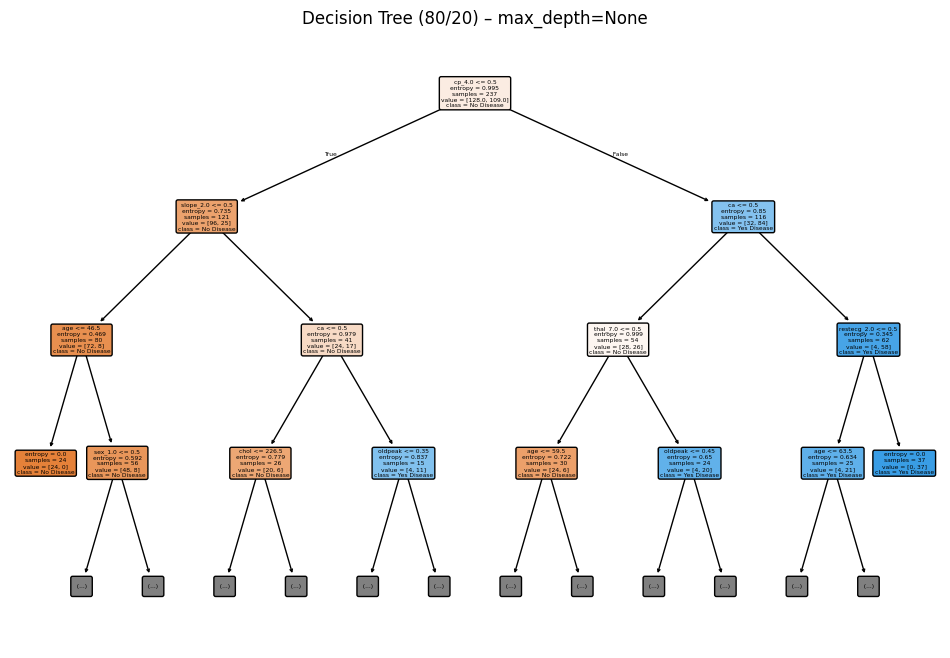

Max Depth = 2: Accuracy = 0.7500


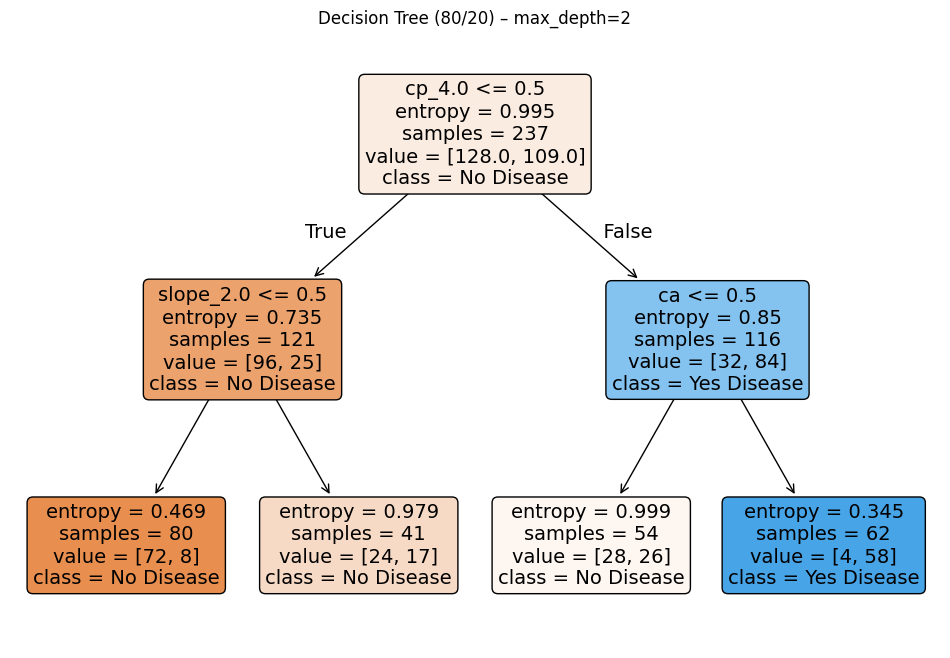

Max Depth = 3: Accuracy = 0.8167


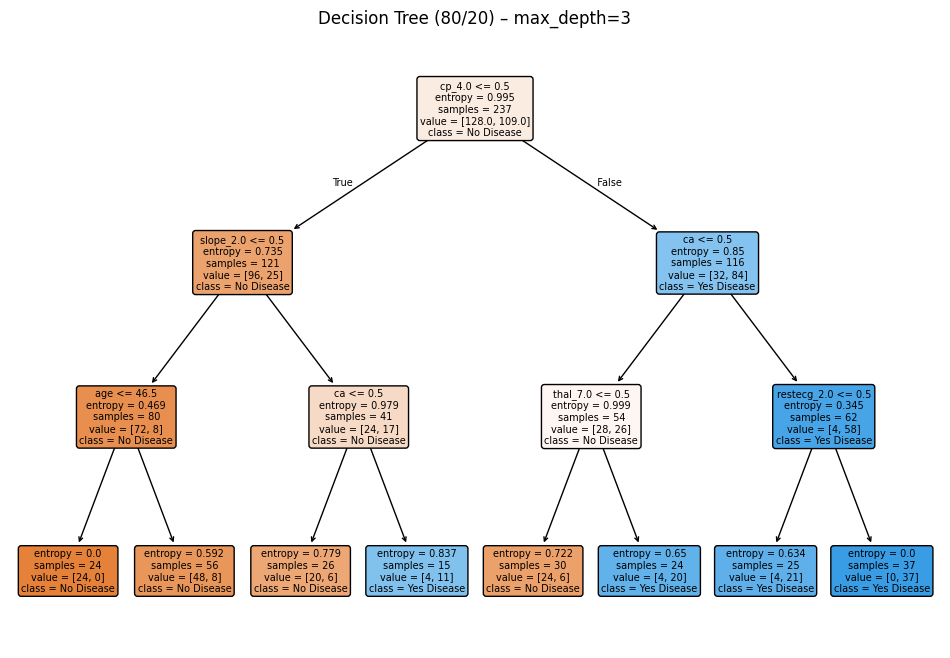

Max Depth = 4: Accuracy = 0.7833


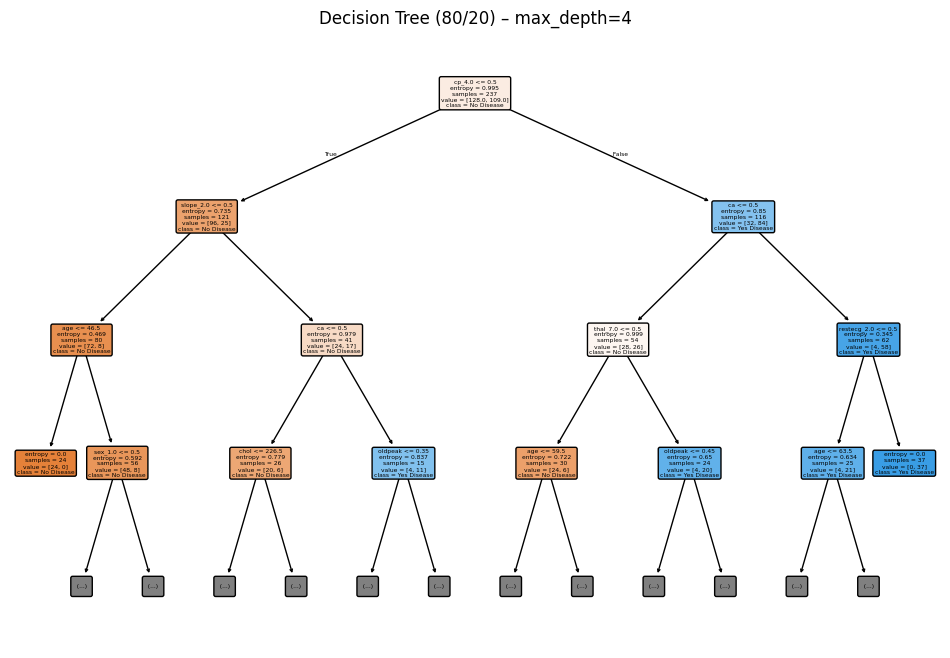

Max Depth = 5: Accuracy = 0.7833


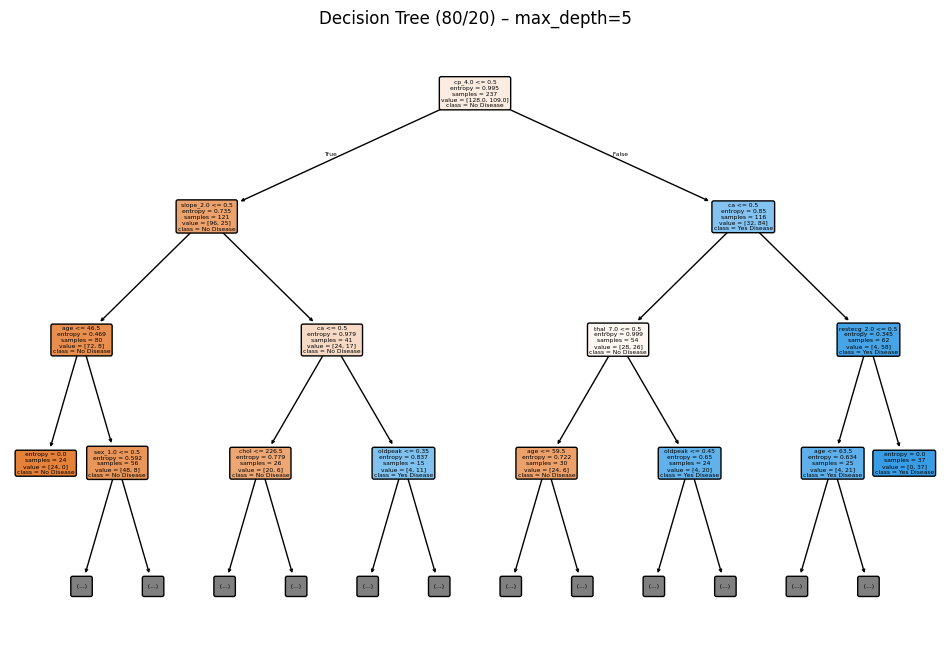

Max Depth = 6: Accuracy = 0.7667


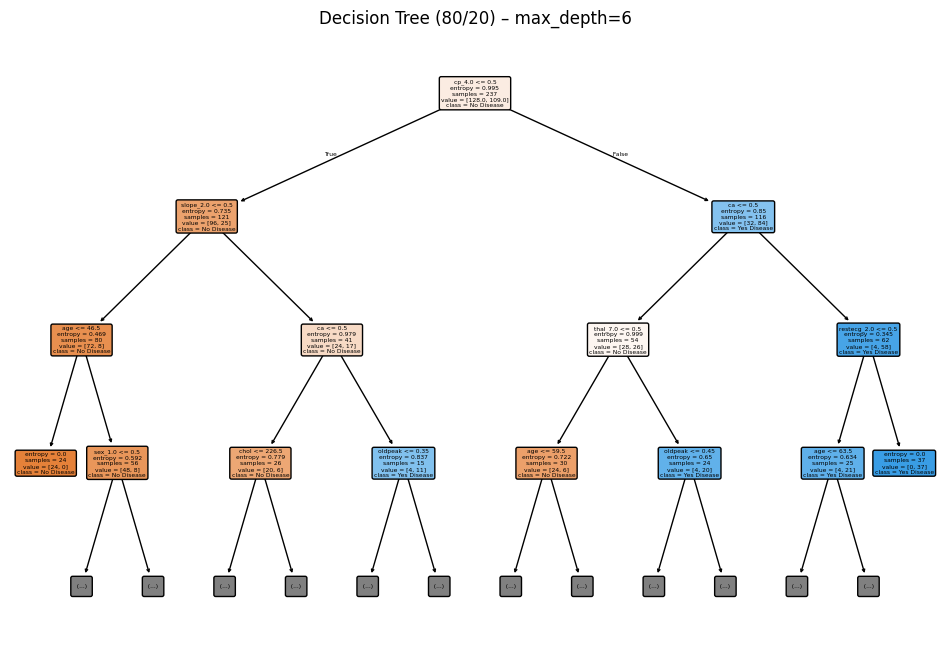

Max Depth = 7: Accuracy = 0.7833


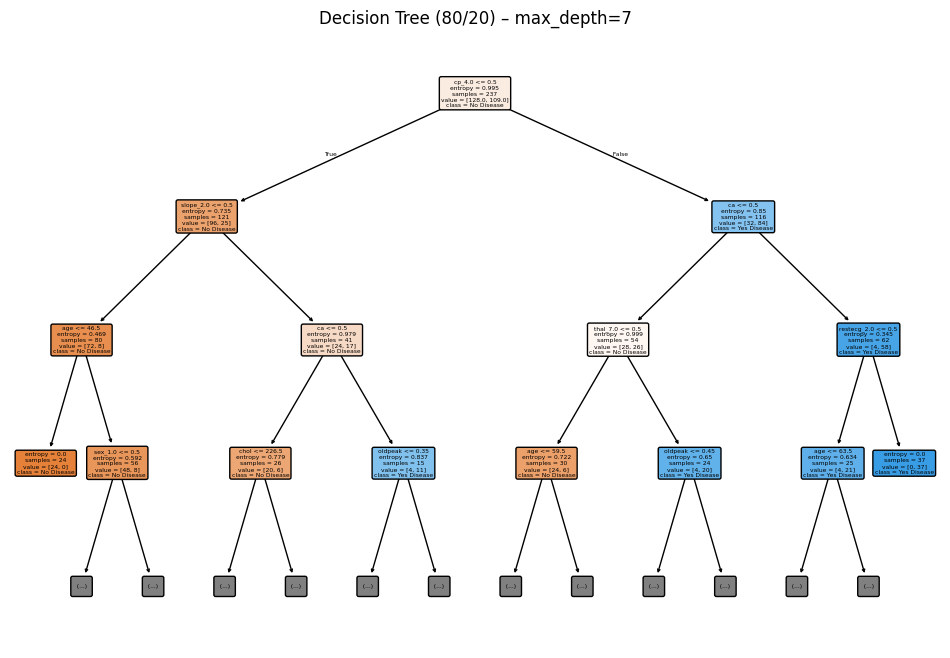

\nSummary Table:
max_depth  Accuracy
     None  0.750000
        2  0.750000
        3  0.816667
        4  0.783333
        5  0.783333
        6  0.766667
        7  0.783333


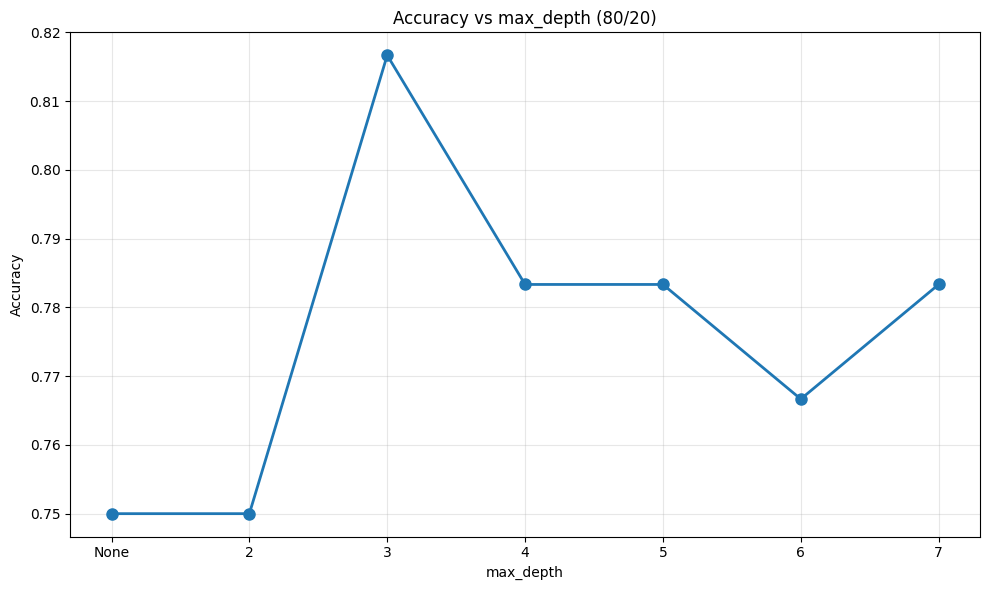

In [39]:
# Max depth analysis using 80/20 split (exact replication from original)
data_8020 = subsets_class['80/20']
X_train = data_8020['X_train']
y_train = data_8020['y_train']
X_test, y_test = data_8020['X_test'], data_8020['y_test']
feature_cols = X_train.columns.tolist()

# 2) Huấn luyện, đo accuracy, vẽ từng cây
depths = [None, 2, 3, 4, 5, 6, 7]
results = []

print("Max Depth Analysis Results:")
print("="*40)

for d in depths:
    # a) Huấn luyện
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = d, random_state = 42)
    clf.fit(X_train, y_train)

    # b) Đo accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((d, acc))
    
    depth_label = 'None' if d is None else str(d)
    print(f"Max Depth = {depth_label}: Accuracy = {acc:.4f}")
    
    # c) Try to visualize each tree (simplified version)
    try:
        plt.figure(figsize=(12, 8))
        plot_tree(clf, 
                 feature_names=feature_cols,
                 class_names=['No Disease', 'Yes Disease'],
                 filled=True, 
                 rounded=True,
                 max_depth=min(3, d) if d is not None else 3)  # Limit visualization depth
        plt.title(f"Decision Tree (80/20) – max_depth={depth_label}")
        plt.show()
    except Exception as e:
        print(f"Could not visualize tree with max_depth={depth_label}: {e}")

# 3) Tạo bảng tổng hợp và vẽ đồ thị
depth_vals, acc_vals = zip(*results)
depth_labels = ['None' if d is None else str(d) for d in depth_vals]

results_df = pd.DataFrame({'max_depth': depth_labels, 'Accuracy': acc_vals})
print("\\nSummary Table:")
print(results_df.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.plot(depth_labels, acc_vals, marker = 'o', linewidth=2, markersize=8)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth (80/20)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# COMPREHENSIVE RANDOM FOREST ANALYSIS


In [40]:
# Complete Random Forest implementation (exact replication from original)
key = '40/60'
data = subsets_class[key]

# Train Random Forest
clf_rf_40_60 = RandomForestClassifier(n_estimators=10, random_state=42)
clf_rf_40_60.fit(data['X_train'], data['y_train'])

# Predict
y_pred_rf = clf_rf_40_60.predict(data['X_test'])

# Confusion Matrix
cm_rf = confusion_matrix(data['y_test'], y_pred_rf)
print(f"Confusion Matrix (Random Forest - {key}):")
print(cm_rf)

# Classification Report
print(f"\\nClassification Report (Random Forest - {key}):")
print(classification_report(data['y_test'], y_pred_rf))


Confusion Matrix (Random Forest - 40/60):
[[90  6]
 [31 52]]
\nClassification Report (Random Forest - 40/60):
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        96
           1       0.90      0.63      0.74        83

    accuracy                           0.79       179
   macro avg       0.82      0.78      0.78       179
weighted avg       0.81      0.79      0.79       179



Visualizing Individual Trees in Random Forest:


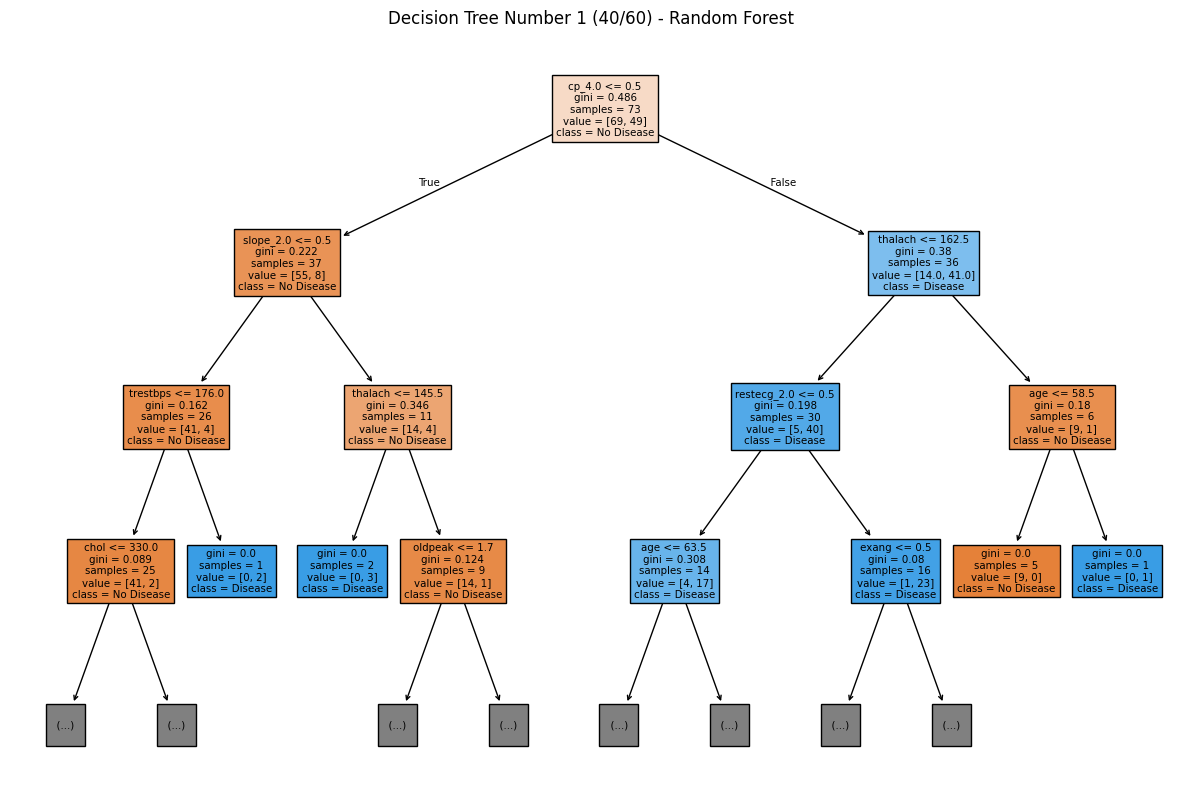

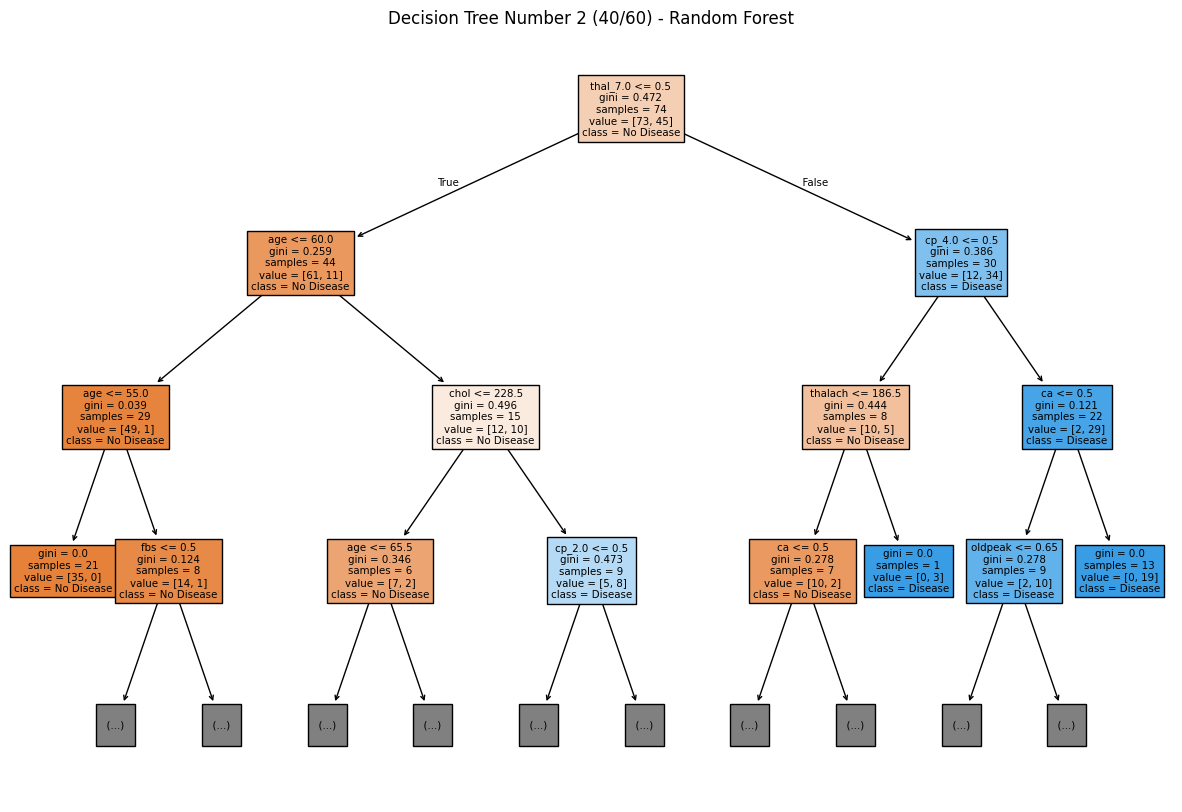

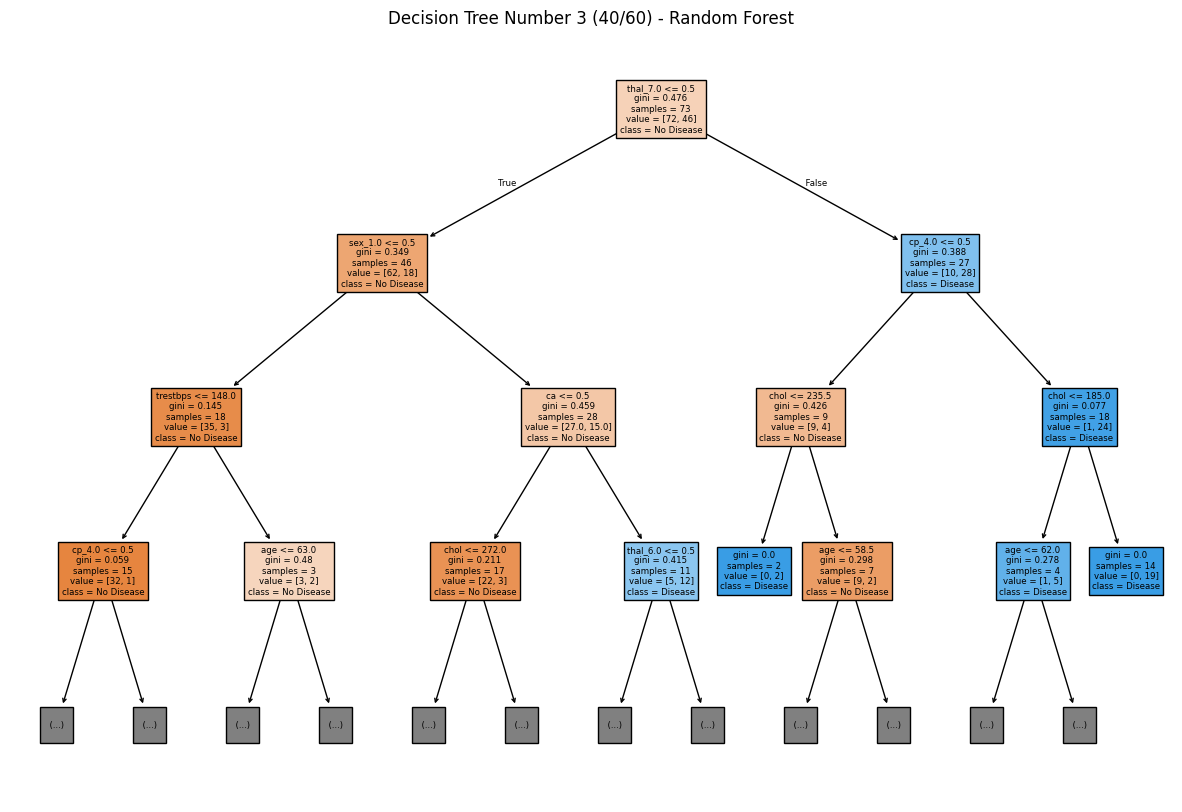

Note: Showing only first 3 out of 10 trees for brevity.


In [41]:
# Visualize individual trees in Random Forest (from original notebook)
print("Visualizing Individual Trees in Random Forest:")
print("="*50)

for i, tree in enumerate(clf_rf_40_60.estimators_):
    if i < 3:  # Show only first 3 trees to avoid too much output
        plt.figure(figsize=(15, 10))
        plot_tree(
            tree,
            filled=True,
            feature_names=data['X_train'].columns.tolist(), 
            class_names=['No Disease', 'Disease'],
            max_depth=3  # Limit depth for readability
        )
        plt.title(f"Decision Tree Number {i+1} ({key}) - Random Forest")
        plt.show()
    else:
        break

print(f"Note: Showing only first 3 out of {len(clf_rf_40_60.estimators_)} trees for brevity.")


In [42]:
# Random Forest performance evaluation (exact replication from original)
key = '40/60'
data = subsets_class[key]

y_true = data['y_test']
y_pred_rf = clf_rf_40_60.predict(data['X_test'])

accuracy = accuracy_score(y_true, y_pred_rf)

misclassified_count = (y_pred_rf != y_true).sum()
total_samples = len(y_true)
misclassified_rate = 100 * misclassified_count / total_samples

print(f"=== Random Forest Performance ({key}) ===")
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")
print(f"Accuracy: {accuracy:.4f}")

# Compare with Decision Tree
dt_pred = clf_dict_full[key].predict(data['X_test'])
dt_accuracy = accuracy_score(y_true, dt_pred)
dt_misclassified = (dt_pred != y_true).sum()
dt_misclassified_rate = 100 * dt_misclassified / total_samples

print(f"\\n=== Comparison: Decision Tree vs Random Forest ===")
print(f"Decision Tree - Wrong labels: {dt_misclassified}/{total_samples} ({dt_misclassified_rate:.2f}%)")
print(f"Random Forest - Wrong labels: {misclassified_count}/{total_samples} ({misclassified_rate:.2f}%)")
print(f"Improvement: {dt_misclassified_rate - misclassified_rate:.2f} percentage points")


=== Random Forest Performance (40/60) ===
Numbers of Wrong labels: 37/179
Ratio of wrong labels: 20.67%
Accuracy: 0.7933
\n=== Comparison: Decision Tree vs Random Forest ===
Decision Tree - Wrong labels: 40/179 (22.35%)
Random Forest - Wrong labels: 37/179 (20.67%)
Improvement: 1.68 percentage points


## Random Forest Explanation

Random Forest : To make it simple we know understand that Random is Random and Forest is a set of Tree. So that in this algorithm we need to build many desicion tree and each of them has randomize order and which Features is used in each step. After we random n data from the dataset then we randomize k features from the set of features(Each features could be the same) and then we weight bias of each Tree output to build the final model.

As we see random forest goes with a better accuracy than traditional Decision Tree.


# COMPLETE REFERENCES FROM BOTH NOTEBOOKS


## References from Original Classification Notebook

https://machinelearningcoban.com/tabml_book/ch_model/random_forest.html
